In [1]:
# For video folder global feature processing:
!dinotool ../test/data/imagefolder -o global_features --save-features 'frame'

Input type: image_directory
Using cache found in /home/mikko/.cache/torch/hub/facebookresearch_dinov2_main
Using model: dinov2_vits14_reg
Model patch size: 14
Using device: cuda
Extracting frame-level features from image directory for single parquet output.
Processed ['test.jpg']: 100%|█████████████████████| 5/5 [00:04<00:00,  1.20it/s]
Saved combined frame features to global_features.parquet


In [2]:
import pandas as pd
df = pd.read_parquet('global_features.parquet')
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_374,feature_375,feature_376,feature_377,feature_378,feature_379,feature_380,feature_381,feature_382,feature_383
filename,,,,,,,,,,,,,,,,,,,,,
Hiidenportti_200.png,0.016293,-0.047004,0.034499,0.008412,-0.011035,0.013308,-0.026522,0.028506,-0.037973,0.114275,...,-0.046624,-0.041139,0.004711,0.059067,-0.014330,0.079243,0.124013,-0.058501,-0.052292,-0.033244
bird1.jpg,-0.014768,0.088492,0.045675,0.004758,-0.016530,-0.017479,0.089095,-0.153574,0.008057,0.055285,...,-0.063378,0.071413,0.008709,0.067160,-0.007855,0.043942,-0.002938,-0.053813,-0.068412,0.004433
magpie.png,-0.034300,0.122956,0.015363,0.026766,-0.014347,0.006275,-0.013190,0.002882,0.037020,0.089615,...,0.120717,0.054668,0.031551,0.009767,0.046261,0.117980,0.068883,-0.039913,0.037031,0.015551
suo.tif,0.003460,-0.040119,0.059208,0.038010,0.033263,-0.015778,-0.064283,0.039265,0.055379,0.025432,...,0.003361,-0.012906,-0.022685,-0.001427,0.005902,-0.126362,-0.119748,-0.011393,-0.064145,0.022403
test.jpg,0.003434,-0.003368,-0.084983,-0.029660,-0.057136,0.049792,0.016399,0.051055,0.028709,0.009585,...,-0.048317,-0.029364,-0.039168,0.015843,0.039281,-0.012742,-0.028227,-0.059039,-0.029867,0.047640


In [3]:
# Full spatial features for a video file:
!dinotool ../test/data/sintel.mp4 -o output/sintel.mp4 --batch-size 4 --save-features 'full'

Input type: video_file
Using cache found in /home/mikko/.cache/torch/hub/facebookresearch_dinov2_main
Using model: dinov2_vits14_reg
Model patch size: 14
Using device: cuda
Original input size: (1280, 546)
Model input size: (1274, 546)
Feature map size: (91, 39)
Fitted PCA with 3 components
Explained variance ratio: [0.15142879 0.13855409 0.09341962]
 98%|███████████████████████████████████████▉ | 117/120 [00:40<00:01,  2.92it/s]ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

data = xr.open_dataarray("output/sintel.zarr")
# The data is stored in a zarr format that can be opened with xarray
# Full feature saving saves the 2D patch maps
data

<xarray.DataArray (frame_idx: 120, y: 39, x: 91, feature: 384)> Size: 654MB
[163537920 values with dtype=float32]
Coordinates:
  * y          (y) int32 156B 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38
  * frame_idx  (frame_idx) int32 480B 0 1 2 3 4 5 6 ... 114 115 116 117 118 119
  * feature    (feature) int32 2kB 0 1 2 3 4 5 6 ... 377 378 379 380 381 382 383
  * x          (x) int32 364B 0 1 2 3 4 5 6 7 8 9 ... 82 83 84 85 86 87 88 89 90

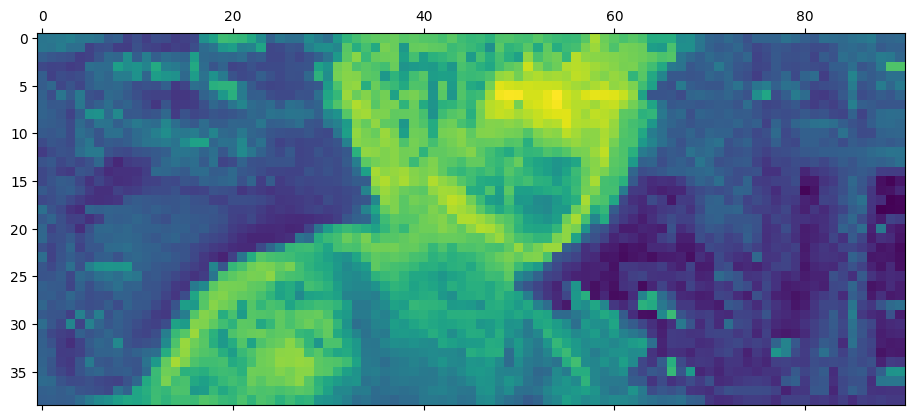

In [5]:
# Visualize the 10th feature of the first frame
plt.matshow(data.sel(frame_idx=0, feature=10).values)

In [6]:
# Data can be also saved in a flat format in parquet files.
# This can make some operations faster.
!dinotool ../test/data/sintel.mp4 -o output/sintel_flat.mp4 --batch-size 4 --save-features 'flat'

Input type: video_file
Using cache found in /home/mikko/.cache/torch/hub/facebookresearch_dinov2_main
Using model: dinov2_vits14_reg
Model patch size: 14
Using device: cuda
Original input size: (1280, 546)
Model input size: (1274, 546)
Feature map size: (91, 39)
Fitted PCA with 3 components
Explained variance ratio: [0.15142879 0.13855409 0.09341962]
 98%|████████████████████████████████████████▎| 118/120 [00:56<00:00,  2.18it/s]ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype

In [7]:
# Data is stored in a parquet directory with multiple files.
# This is needed for large datasets.
# Reading data can be done with dask
import dask.dataframe as dd
from dask.distributed import LocalCluster
cluster = LocalCluster(n_workers=18,
                       threads_per_worker=1,
                       memory_limit='32GB')
client = cluster.get_client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 18
Total threads: 18,Total memory: 536.44 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38199,Workers: 18
Dashboard: http://127.0.0.1:8787/status,Total threads: 18
Started: Just now,Total memory: 536.44 GiB
Comm: tcp://127.0.0.1:40175,Total threads: 1
Dashboard: http://127.0.0.1:36107/status,Memory: 29.80 GiB
Nanny: tcp://127.0.0.1:40825,


In [8]:
df = dd.read_parquet("output/sintel_flat.parquet")
arr = df.to_dask_array(lengths=True).rechunk((10_000, 384))
arr

dask.array<rechunk-merge, shape=(425880, 384), dtype=float32, chunksize=(10000, 384), chunktype=numpy.ndarray>

In [9]:
# For small videos this file can be combined into a single file